In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

RuntimeError: matplotlib does not support generators as input

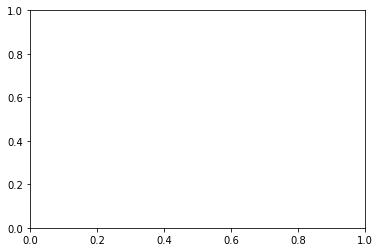

In [4]:
years = [2005 + i for i in range(18)]
three_pt_attempt_rates = []
for year in years: 
    url = f"https://www.basketball-reference.com/leagues/NBA_{year}_advanced.html"
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    table = soup.find('table', attrs={'id': 'advanced_stats'})
    headers = [th.get_text() for th in table.find_all('tr', limit=2)[0].find_all('th')][1:]
    # get rows from table
    rows = soup.find_all('tr')[1:]
    rows_data = [[td.get_text() for td in rows[i].find_all('td')]
                        for i in range(len(rows))]
    rows_data = [row for row in rows_data if len(row) == len(headers)]
    df = pd.DataFrame(rows_data, columns=headers)
    df['3PAr'] = df['3PAr'].apply(lambda x: 0 if x == '' else x)
    df['3PAr'] = df['3PAr'].astype(float)
    three_pt_attempt_rates.append(df['3PAr'].mean())
plt.xticks(map(lambda x: str(x), years))
plt.bar(years, three_pt_attempt_rates, width=2)


In [9]:
url = "https://www.basketball-reference.com/leagues/NBA_2022_shooting.html"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
#soup

In [15]:
table = soup.find('table', attrs={'id': 'shooting_stats'})
headers = [th.get_text() for th in table.find_all('tr', limit=2)[1].find_all('th')][1:]
# print(headers)

# get rows from table
rows = soup.find_all('tr')[2:]
rows_data = [[td.get_text() for td in rows[i].find_all('td')]
                    for i in range(len(rows))]
rows_data = [row for row in rows_data if len(row) == len(headers)]
pd.DataFrame(rows_data, columns=headers)


,Player,Pos,Age,Tm,G,MP,FG%,Dist.,,2P,...,3P,,%FGA,#,,%3PA,3P%,,Att.,#
0,Precious Achiuwa,C,22,TOR,73,1725,.439,10.2,,.741,...,.964,,.143,67,,.429,.313,,0,0
1,Steven Adams,C,28,MEM,76,1999,.547,2.9,,.997,...,,,.143,48,,.000,,,1,0
2,Bam Adebayo,C,24,MIA,56,1825,.557,7.0,,.992,...,,,.181,119,,.000,,,2,0
3,Santi Aldama,PF,21,MEM,32,360,.402,12.0,,.636,...,1.000,,.076,10,,.229,.364,,0,0
4,LaMarcus Aldridge,C,36,BRK,47,1050,.550,12.3,,.900,...,1.000,,.039,18,,.283,.308,,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,Thaddeus Young,PF,33,TOR,26,475,.465,10.1,,.701,...,1.000,,.035,4,,.651,.500,,0,0
808,Trae Young,PG,23,ATL,76,2652,.460,16.5,,.605,...,.223,,.000,0,,.048,.552,,1,0
809,Omer Yurtseven,C,23,MIA,56,706,.526,5.8,,.955,...,1.000,,.178,39,,.182,.000,,0,0
810,Cody Zeller,C,29,POR,27,355,.567,3.7,,.956,...,,,.211,16,,.250,.000,,0,0
